In [1]:
#importing the Library
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
#importing the dataset 
df_cf=pd.read_csv("C:/Users/Admin/Documents/Coca_cola_Cashflow_statement.csv")

In [3]:
df_cf.head()

,DT,Cash_Flow_from_Investing_Activities,Cash Flow from Operating Activities,Cash Flow from Financial Activities,Net Cash Flow
0,31-03-2009,-599,3923.0,-975.0,1295.0
1,30-06-2009,-565,623.0,-297.0,-2344.0
2,30-09-2009,-396,3394.0,-195.0,-1617.0
3,31-12-2009,-2589,3706.0,-1629.0,2113.0
4,31-03-2010,-1368,3889.0,-5326.0,704.0


In [4]:
#checking for null values
df_cf.isnull().sum()

DT                                     0
Cash_Flow_from_Investing_Activities    0
Cash Flow from Operating Activities    0
Cash Flow from Financial Activities    0
Net Cash Flow                          0
dtype: int64

In [5]:
df_cf.tail()

,DT,Cash_Flow_from_Investing_Activities,Cash Flow from Operating Activities,Cash Flow from Financial Activities,Net Cash Flow
49,30-06-2021,2034,1326.0,-1043.0,-1337.0
50,30-09-2021,166,1916.0,-1409.0,-1825.0
51,31-12-2021,-4684,2608.0,-1026.0,1199.0
52,31-03-2022,146,2789.0,-1675.0,831.0
53,30-06-2022,-1291,873.0,1817.0,2115.0


In [6]:
df_cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DT                                   54 non-null     object 
 1   Cash_Flow_from_Investing_Activities  54 non-null     int64  
 2   Cash Flow from Operating Activities  54 non-null     float64
 3   Cash Flow from Financial Activities  54 non-null     float64
 4   Net Cash Flow                        54 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# changing dt data type to datetime format
df_cf["DT"]=pd.to_datetime(df_cf["DT"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_11764\905396716.py:2: UserWarning: Parsing '31-03-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_cf["DT"]=pd.to_datetime(df_cf["DT"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11764\905396716.py:2: UserWarning: Parsing '30-06-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_cf["DT"]=pd.to_datetime(df_cf["DT"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11764\905396716.py:2: UserWarning: Parsing '30-09-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_cf["DT"]=pd.to_datetime(df_cf["DT"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11764\905396716.py:2: UserWarning: Parsing '31-12-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_cf["DT"]=pd.to_datetime(df_cf["DT"])
C:\Users\Admin\AppData\Local\Temp\ip

In [8]:
#setting dt as the index
df_cf.set_index("DT",inplace=True)

In [9]:
del df_cf["Cash_Flow_from_Investing_Activities"],df_cf["Cash Flow from Financial Activities"],df_cf["Net Cash Flow"]

<AxesSubplot:xlabel='DT'>

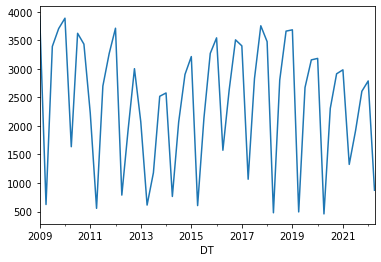

In [10]:
df_cf['Cash Flow from Operating Activities'].plot()

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [13]:
adf_test(df_cf['Cash Flow from Operating Activities'])

ADF Statistics: -2.091072520754911
p- value: 0.24811950550933165
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [14]:
## Use Techniques Differencing
df_cf['Cash Flow from Operating Activities1']=df_cf['Cash Flow from Operating Activities']-df_cf['Cash Flow from Operating Activities'].shift(1)

In [15]:
df_cf.head()

,Cash Flow from Operating Activities,Cash Flow from Operating Activities1
DT,,
2009-03-31,3923.0,NaN
2009-06-30,623.0,-3300.0
2009-09-30,3394.0,2771.0
2009-12-31,3706.0,312.0
2010-03-31,3889.0,183.0


In [16]:
adf_test(df_cf['Cash Flow from Operating Activities1'].dropna())

ADF Statistics: -4.569625504057866
p- value: 0.00014688590110160571
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

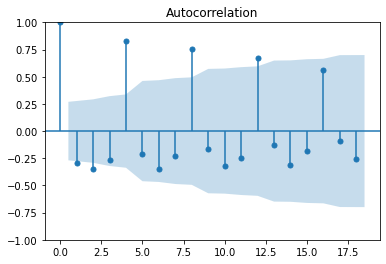

In [18]:
acf = plot_acf(df_cf["Cash Flow from Operating Activities1"].dropna())

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


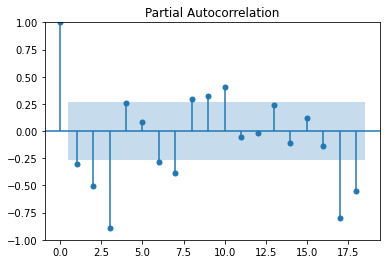

In [19]:
pacf12 = plot_pacf(df_cf["Cash Flow from Operating Activities1"].dropna())

In [20]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2019,12,31)
test_dataset_end=datetime(2022,6,30)

In [21]:
train_data=df_cf[:train_dataset_end]
test_data=df_cf[train_dataset_end+timedelta(days=1):test_dataset_end]

In [22]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [23]:
test_data

,Cash Flow from Operating Activities,Cash Flow from Operating Activities1
DT,,
2020-03-31,3184.0,26.0
2020-06-30,458.0,-2726.0
2020-09-30,2308.0,1850.0
2020-12-31,2914.0,606.0
2021-03-31,2984.0,70.0
2021-06-30,1326.0,-1658.0
2021-09-30,1916.0,590.0
2021-12-31,2608.0,692.0
2022-03-31,2789.0,181.0


In [24]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [25]:
model_ARIMA=ARIMA(train_data['Cash Flow from Operating Activities1'],order=(7,1,1))

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


In [26]:
model_Arima_fit=model_ARIMA.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                         
================================================================================================
Dep. Variable:     Cash Flow from Operating Activities1   No. Observations:                   44
Model:                                   ARIMA(7, 1, 1)   Log Likelihood                -335.989
Date:                                  Tue, 27 Sep 2022   AIC                            689.979
Time:                                          15:56:41   BIC                            705.830
Sample:                                      03-31-2009   HQIC                           695.824
                                           - 12-31-2019                                         
Covariance Type:                                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0655      0.235     -4.527      0.000      -1.527      -0.604
ar.L2         -1.0619      0.288     -3.685      0.000      -1.627      -0.497
ar.L3         -1.3958      0.346     -4.032      0.000      -2.074      -0.717
ar.L4         -0.9771      0.452     -2.161      0.031      -1.863      -0.091
ar.L5         -0.8816      0.242     -3.637      0.000      -1.357      -0.406
ar.L6         -0.8901      0.193     -4.615      0.000      -1.268      -0.512
ar.L7         -0.5599      0.147     -3.819      0.000      -0.847      -0.273
ma.L1         -0.4771      0.209     -2.280      0.023      -0.887      -0.067
sigma2      2.475e+05   7.23e+04      3.422      0.001    1.06e+05    3.89e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.82   Prob(JB):                         0.64
Heteroskedasticity (H):               0.48   Skew:                             0.15
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2020-03-31 00:00:00
2022-06-30 00:00:00


In [29]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Cash Flow from Operating Activities1']-pred

In [30]:
pred

2020-03-31     131.890682
2020-06-30   -2988.522919
2020-09-30    2229.006487
2020-12-31     724.586267
2021-03-31       0.430082
2021-06-30   -3052.000333
2021-09-30    1986.072169
2021-12-31     714.880196
2022-03-31     117.042450
2022-06-30   -2889.955754
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [31]:
residuals

DT
2020-03-31    -105.890682
2020-06-30     262.522919
2020-09-30    -379.006487
2020-12-31    -118.586267
2021-03-31      69.569918
2021-06-30    1394.000333
2021-09-30   -1396.072169
2021-12-31     -22.880196
2022-03-31      63.957550
2022-06-30     973.955754
dtype: float64

<AxesSubplot:ylabel='Density'>

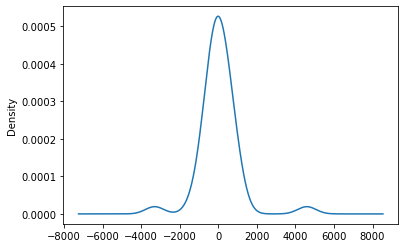

In [32]:
model_Arima_fit.resid.plot(kind='kde')

In [33]:
test_data['Predicted_ARIMA']=pred

C:\Users\Admin\AppData\Local\Temp\ipykernel_11764\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='DT'>

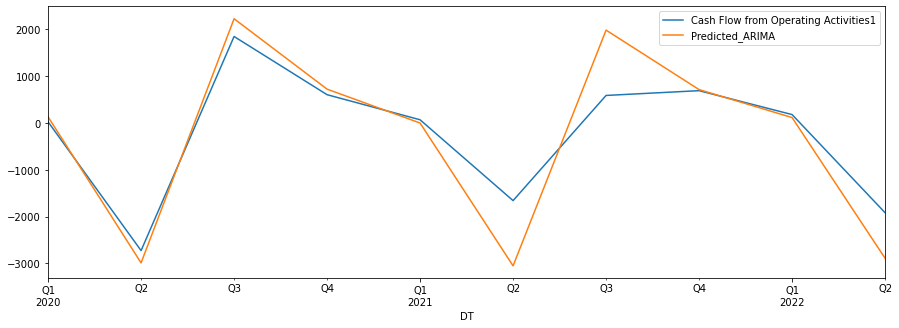

In [34]:
test_data[['Cash Flow from Operating Activities1','Predicted_ARIMA']].plot(figsize=(15,5))

In [35]:
test_data

,Cash Flow from Operating Activities,Cash Flow from Operating Activities1,Predicted_ARIMA
DT,,,
2020-03-31,3184.0,26.0,131.890682
2020-06-30,458.0,-2726.0,-2988.522919
2020-09-30,2308.0,1850.0,2229.006487
2020-12-31,2914.0,606.0,724.586267
2021-03-31,2984.0,70.0,0.430082
2021-06-30,1326.0,-1658.0,-3052.000333
2021-09-30,1916.0,590.0,1986.072169
2021-12-31,2608.0,692.0,714.880196
2022-03-31,2789.0,181.0,117.042450


<AxesSubplot:xlabel='DT'>

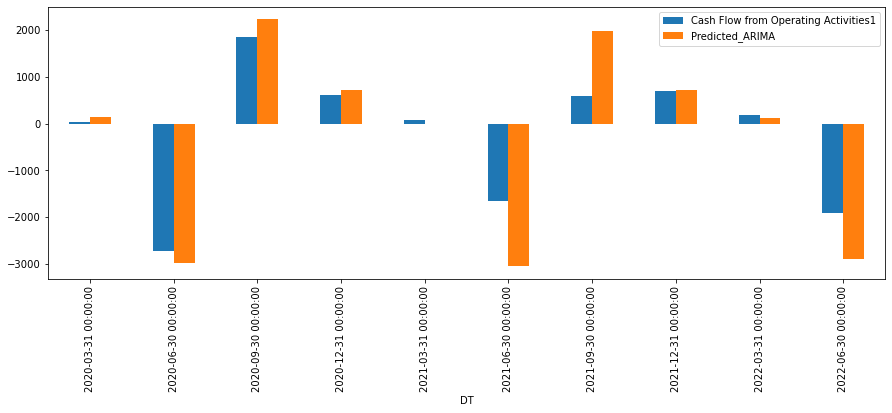

In [36]:
test_data[['Cash Flow from Operating Activities1','Predicted_ARIMA']].plot.bar(figsize=(15,5))

In [37]:
from pandas.tseries.offsets import DateOffset
future_dates=[test_data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [38]:
future_dates

[Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-07-30 00:00:00'),
 Timestamp('2022-08-30 00:00:00'),
 Timestamp('2022-09-30 00:00:00'),
 Timestamp('2022-10-30 00:00:00'),
 Timestamp('2022-11-30 00:00:00'),
 Timestamp('2022-12-30 00:00:00'),
 Timestamp('2023-01-30 00:00:00'),
 Timestamp('2023-02-28 00:00:00'),
 Timestamp('2023-03-30 00:00:00'),
 Timestamp('2023-04-30 00:00:00'),
 Timestamp('2023-05-30 00:00:00'),
 Timestamp('2023-06-30 00:00:00'),
 Timestamp('2023-07-30 00:00:00'),
 Timestamp('2023-08-30 00:00:00'),
 Timestamp('2023-09-30 00:00:00'),
 Timestamp('2023-10-30 00:00:00'),
 Timestamp('2023-11-30 00:00:00'),
 Timestamp('2023-12-30 00:00:00'),
 Timestamp('2024-01-30 00:00:00'),
 Timestamp('2024-02-29 00:00:00'),
 Timestamp('2024-03-30 00:00:00'),
 Timestamp('2024-04-30 00:00:00'),
 Timestamp('2024-05-30 00:00:00')]

In [39]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=test_data.columns)

In [40]:
future_datest_df

,Cash Flow from Operating Activities,Cash Flow from Operating Activities1,Predicted_ARIMA
2022-07-30,NaN,NaN,NaN
2022-08-30,NaN,NaN,NaN
2022-09-30,NaN,NaN,NaN
2022-10-30,NaN,NaN,NaN
2022-11-30,NaN,NaN,NaN
2022-12-30,NaN,NaN,NaN
2023-01-30,NaN,NaN,NaN
2023-02-28,NaN,NaN,NaN
2023-03-30,NaN,NaN,NaN
2023-04-30,NaN,NaN,NaN


In [41]:
future_df=pd.concat([test_data,future_datest_df])

In [42]:
future_df

,Cash Flow from Operating Activities,Cash Flow from Operating Activities1,Predicted_ARIMA
2020-03-31,3184.0,26.0,131.890682
2020-06-30,458.0,-2726.0,-2988.522919
2020-09-30,2308.0,1850.0,2229.006487
2020-12-31,2914.0,606.0,724.586267
2021-03-31,2984.0,70.0,0.430082
2021-06-30,1326.0,-1658.0,-3052.000333
2021-09-30,1916.0,590.0,1986.072169
2021-12-31,2608.0,692.0,714.880196
2022-03-31,2789.0,181.0,117.04245
2022-06-30,873.0,-1916.0,-2889.955754


In [43]:
##prediction
pred_start_date=future_datest_df.index[0]
pred_end_date=future_datest_df.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-07-30 00:00:00
2024-05-30 00:00:00


In [44]:
pred_future=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Cash Flow from Operating Activities1']-pred

In [45]:
pred_future

2022-09-30    1978.741384
2022-12-31     741.596376
2023-03-31      16.563540
2023-06-30   -2917.495210
2023-09-30    1843.444573
2023-12-31     826.091098
2024-03-31      99.060567
2024-06-30   -2810.460524
Freq: Q-DEC, Name: predicted_mean, dtype: float64

<AxesSubplot:>

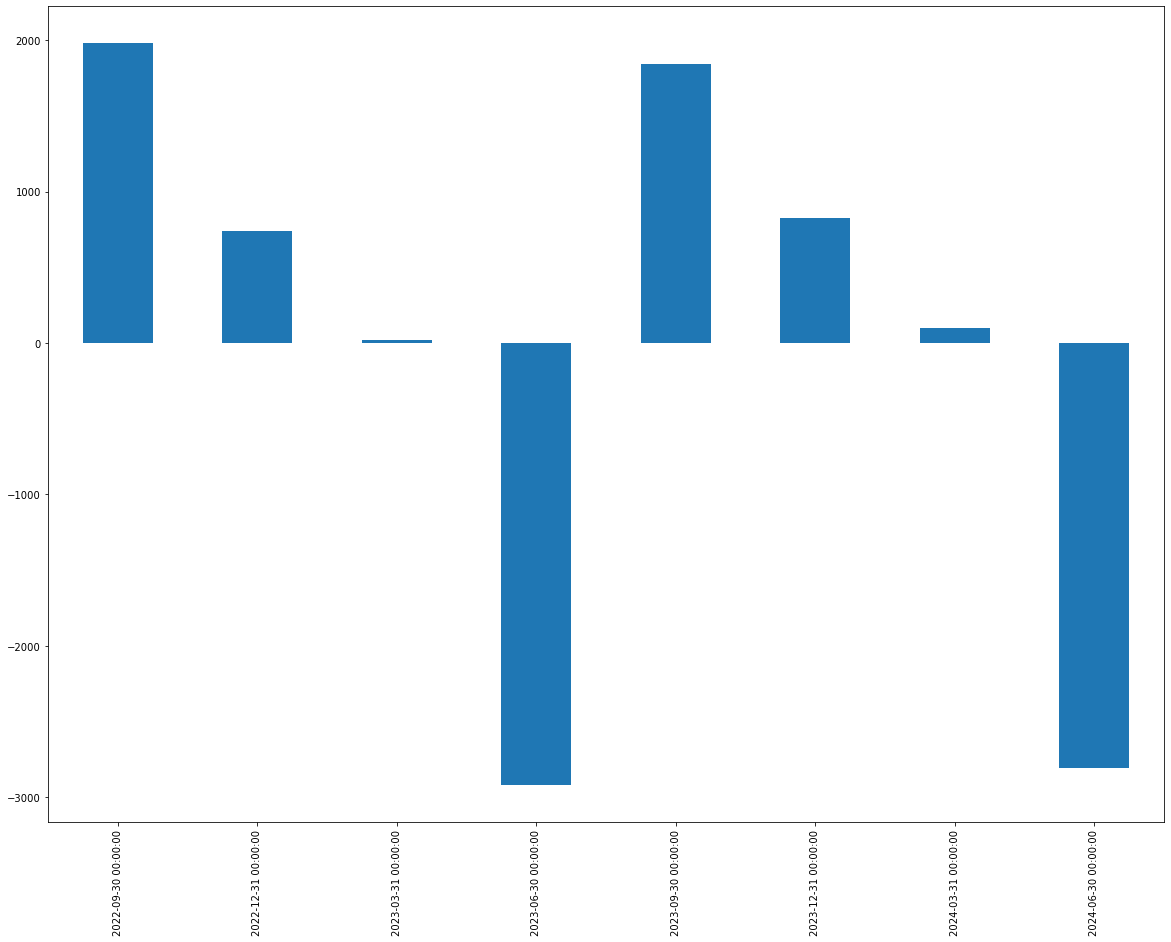

In [49]:
pred_future.plot.bar(figsize=(20,15))